In [3]:
import ipywidgets as widgets
import os
import numpy as np
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import time
import matplotlib.pyplot as plt

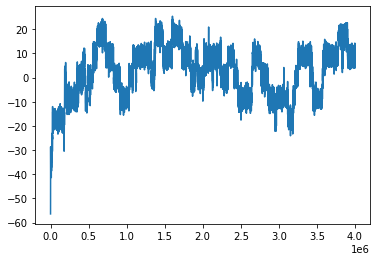

In [17]:
R0 = np.loadtxt("R0.txt")
R = np.loadtxt("eta1qdpldm-focused-PFS_morse_1mode.R")
plt.plot(R[:,0],R[:,1])
#plt.plot(R0[:,0],R0[:,1])


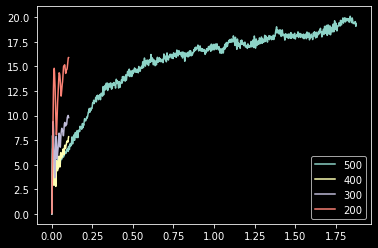

In [46]:
def total(wc):
    Pii = np.loadtxt(f"eta1/w{wc}/qdpldm-focused-PFS_morse_1mode.txt")
    n = len(Pii[0,1:])
    P =  Pii[:,1] + Pii[:,2] #* wc 
    for i in range(2,n):
        P +=  Pii[:,i+1] #* i * wc  
        
    plt.plot(Pii[:,0]/41350, P[:], label=f'{wc}')

def photon(wc):
    Pii = np.loadtxt(f"eta1/w{wc}/qdpldm-focused-PFS_morse_1mode.txt")
    n = len(Pii[0,1:])
    P =   Pii[:,2] * wc 
    for i in range(2,n):
        P +=  Pii[:,i+1] * i * wc  
        
    plt.plot(Pii[:,0]/41350, P[:], label=f'{wc}')
#show(50)
#show(100)
#show(150)
#show(200)
photon(500)
photon(400)
photon(300)
photon(200)
#show(300)
#show(500)
#show(750)

plt.legend(loc='best')
#plt.ylim(0.99,1.01)


(0.99, 1.01)

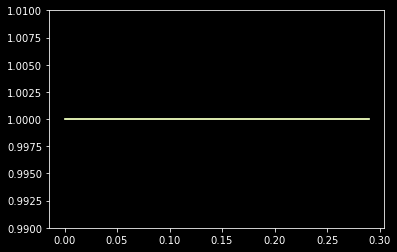

In [80]:
total(500)
total(400)
total(300)
total(200)
plt.ylim(0.99,1.01)

No handles with labels found to put in legend.


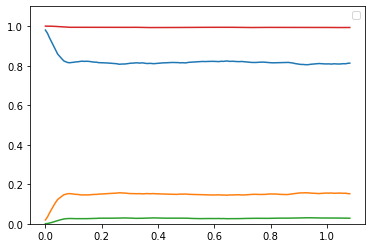

In [359]:
def show2(wc):
    Pii = np.loadtxt(f"eta1/w{wc}/qdpldm-focused-PFS_morse_1mode.txt")
 
    plt.plot(Pii[:,0]/41350, Pii[:,1]  )
    plt.plot(Pii[:,0]/41350, Pii[:,2]  )
    plt.plot(Pii[:,0]/41350, Pii[:,3]  )
    plt.plot(Pii[:,0]/41350,Pii[:,1] + Pii[:,2] + Pii[:,3]  )
 
#show2(150)
#show2(200)
#show2(500)
show2(100)
plt.ylim(0.0,1.1)
plt.legend(loc='best')


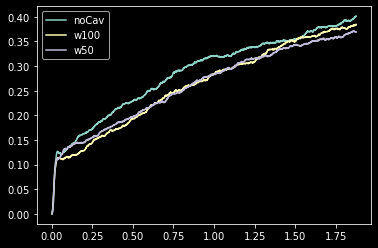

In [65]:
def reac(wc): 
    Pii = np.loadtxt(f"eta1/{wc}/qdpldm-focused-PFS_morse_1mode.react")
    plt.plot(Pii[:,0]/41350,Pii[:,1], label=wc)
    #plt.plot(Pii[:,0]/41350,Pii[:,2], label=wc)


#reac("noCav")

#reac("w50")
#reac("w100")
reac("noCav")
 
reac("w100")
reac("w50")
#plt.ylim(-0.1,0.1)
#plt.xlim(0,0.1)
plt.legend(loc='best')
plt.show()

In [44]:
@interact
def pot(a= '0.0000000006',b = '0.000003' ):
    b = float(b) 
    a = float(a)

    x = np.arange(-200,200,0.01)
    E = a*x**4 - b * x**2.0  

    # x   = (b/2a)**0.5
    # a*x**4 - b * x**2.0  
    # DD => 12.0 * a*x**2 - 2.0 * b 
    # DD => 6.0 *(b) - 2.0 * b = 4.0 * b

    # At x= 0 


    # Emin =  (b**2.0/16*a)  -   (4b**2.0/16*a) = 3 * b**2.0 / 16 * a
    print ("Emin:", np.min(E)*27.2114)
    E -= np.min(E)
    
    print ("Xmin: ",(b/(2*a))**0.5)
    x0 = -x[np.argmin(E)]
    w0 = 2* (b)**0.5 #* 27.2114
    wb = (2.0 * b)**0.5
    
    #wb = w0 * 2.0
    H = 0.5 * w0**2.0 * (x-x0)**2.0
     
    plt.ylim(0,0.5)
    print ("Well freq:    ", w0 * 27.2114)  
    print ("Barrier freq: ",wb * 27.2114) 
    plt.plot(x,E * 27.2114)
    plt.plot(x,H * 27.2114)

    β = 1053.8
    
 
 

    sigP = np.sqrt( w0 / ( 2 * np.tanh( 0.5*β*w0 ) ) )
    sigR = sigP/w0
    print (f"3 x σR = {sigR * 3.0}")
    

interactive(children=(Text(value='0.0000000006', description='a'), Text(value='0.000003', description='b'), Ou…

$k = \lim_{t\rightarrow\infty} \frac{\dot{P}(t)}{1-\frac{P(t)}{{P}_{ss}}}$

1.6506281047062355e-06
5173
7.831375296549231e-07
800
2.4173646546321015e-06
800


(0.0, 10000.0)

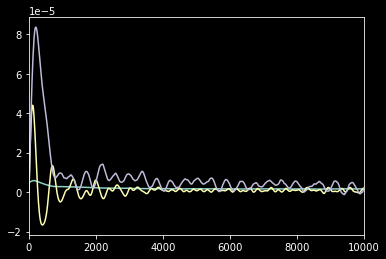

In [79]:
wc = "w50"
def kt(wc):
    P  = np.loadtxt(f"eta1/{wc}/qdpldm-focused-PFS_morse_1mode.txt")

    t  = P[:,0]
    P  = P[:,1]
    dt =  t[1] - t[0]

    dP = np.zeros((len(P)))

    for i in range(1,len(P)-1):
        dP[i] = (P[i+1] - P[i-1])/(2*dt)

    kt = dP/(1- P/0.5)
    print (np.sum(kt[600:800])/len(kt[600:800]))
    print (len(kt))
    plt.plot(t[ :], kt[:])

kt("noCav")
#kt("w50")
kt("w400")
kt("w200")
plt.xlim(000.0,10000)
#plt.ylim(-0.000002,0.000002)